In [1]:
# by Joh Schöneberg 2018/2019

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

runOnJohsComputer = False

pathOfTheYeastTrackAnalysisFolder = '/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/'
if(runOnJohsComputer):
    pathOfTheYeastTrackAnalysisFolder = '/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

In [2]:
# from https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

# input data

In [3]:

path = "/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/"
if(runOnJohsComputer):
    path = "/Users/johannesschoeneberg/git/DrubinBarnes/YeastTrackAnalysis/sample_data_goodFromExcel/forJoh/"


# change your filename to the file you want to analyze
path_to_all_tracks_data = path+"fim1/"

if(runOnJohsComputer):
    path_to_all_tracks_data = path+"sla1/"

allTracksFilename = 'all_tracks.csv'

outputpath = path_to_all_tracks_data

In [4]:
filenamesData = pd.read_csv(outputpath+allTracksFilename+"_allProcessedFilePaths.csv")
filenamesData[0:5]

,Unnamed: 0,filenames
0,0,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
1,1,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
2,2,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
3,3,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...
4,4,/Users/yidi_lab/Desktop/YeastTrackAnalysis-mas...


In [5]:
# get all the data from the csv lifetimes, max intensities

trackIds = []
lifetimes_frames = []
lifetimes_seconds = []
maxIntensities = []
intensities_atAlignmentPoint_byDistance = []
intensities_atAlignmentPoint_byIntensity_raw = []
intensities_atAlignmentPoint_byIntensity_minMaxRescaled= []

#∆t intensity
intensities_atAlignmentPoint_byDistance_dt = []
intensities_atAlignmentPoint_byIntensity_raw_dt = []
intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt= []
#∆t distance
distances_atAlignmentPoint_byDistance_dt = []
distances_atAlignmentPoint_byIntensity_raw_dt = []
distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt= []



filenames = filenamesData['filenames']
for filename in filenames:

    data = pd.read_csv(filename)
    
    trackId = data['Trajectory'][0]
    lifetime_frames = data['lifetime_frames'][0]
    lifetime_seconds = data['lifetime_seconds'][0]
    max_intensity_AU = data['max_intensity_AU'][0]
    intensity_atAlignmentPoint_byDistance = data['inflectionPoint_fromDistance_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_raw = data['inflectionPoint_fromIntensity_raw_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_minMaxRescaled = data['inflectionPoint_fromIntensity_minMaxRescaled_Intensity'][0]
    intensities_atAlignmentPoint_byDistance.append(intensity_atAlignmentPoint_byDistance)
    intensities_atAlignmentPoint_byIntensity_raw.append(intensity_atAlignmentPoint_byIntensity_raw)
    intensities_atAlignmentPoint_byIntensity_minMaxRescaled.append(intensity_atAlignmentPoint_byIntensity_minMaxRescaled)
    #∆t
    inflectionPoint_dt = data['dt']
    intensity_atAlignmentPoint_byDistance_dt = data['inflectionPoint_fromDistance_Time_plus_dt_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_raw_dt = data['inflectionPoint_fromIntensity_raw_Time_plus_dt_Intensity'][0]
    intensity_atAlignmentPoint_byIntensity_minMaxRescaled_dt= data['inflectionPoint_fromIntensity_minMaxRescaled_Time_plus_dt_Intensity'][0]
    intensities_atAlignmentPoint_byDistance_dt.append(intensity_atAlignmentPoint_byDistance)
    intensities_atAlignmentPoint_byIntensity_raw_dt.append(intensity_atAlignmentPoint_byIntensity_raw)
    intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt.append(intensity_atAlignmentPoint_byIntensity_minMaxRescaled)
    #∆t distance
    distance_atAlignmentPoint_byDistance_dt = data['inflectionPoint_fromDistance_Time_plus_dt_Distance'][0]
    distance_atAlignmentPoint_byIntensity_raw_dt = data['inflectionPoint_fromIntensity_raw_Time_plus_dt_Distance'][0]
    distance_atAlignmentPoint_byIntensity_minMaxRescaled_dt= data['inflectionPoint_fromIntensity_minMaxRescaled_Time_plus_dt_Distance'][0]
    distances_atAlignmentPoint_byDistance_dt.append(distance_atAlignmentPoint_byDistance_dt)
    distances_atAlignmentPoint_byIntensity_raw_dt.append(distance_atAlignmentPoint_byIntensity_raw_dt)
    distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt.append(distance_atAlignmentPoint_byIntensity_minMaxRescaled_dt)

    
    trackIds.append(trackId)
    lifetimes_frames.append(lifetime_frames)
    lifetimes_seconds.append(lifetime_seconds)
    maxIntensities.append(max_intensity_AU)
    
    
    
    
    

# export these values into an excel
combinedDataFilePath = outputpath+allTracksFilename+'_allProcessedFiles_summary.csv'
print(combinedDataFilePath)
df = pd.DataFrame()
df['trackIds'] = trackIds
df['lifetimes_frames'] = lifetimes_frames
df['lifetimes_seconds'] = lifetimes_seconds
df['maxIntensities'] = maxIntensities
df['dt'] = inflectionPoint_dt

# black
df['intensities_atAlignmentPoint_byDistance'] = intensities_atAlignmentPoint_byDistance
# red
df['intensities_atAlignmentPoint_byIntensity_raw'] = intensities_atAlignmentPoint_byIntensity_raw
# blue
df['intensities_atAlignmentPoint_byIntensity_minMaxRescaled'] = intensities_atAlignmentPoint_byIntensity_minMaxRescaled
# black, dashed
df['intensities_atAlignmentPoint_byDistance_plus_dt'] = intensities_atAlignmentPoint_byDistance_dt
df['distances_atAlignmentPoint_byDistance_plus_dt'] = distances_atAlignmentPoint_byDistance_dt
# red, dashed
df['intensities_atAlignmentPoint_byIntensity_raw_plus_dt'] = intensities_atAlignmentPoint_byIntensity_raw_dt
df['distances_atAlignmentPoint_byIntensity_raw_plus_dt'] = distances_atAlignmentPoint_byIntensity_raw_dt
# blue, dashed
df['intensities_atAlignmentPoint_byIntensity_minMaxRescaled_plus_dt'] = intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt
df['distances_atAlignmentPoint_byIntensity_minMaxRescaled_plus_dt'] = distances_atAlignmentPoint_byIntensity_minMaxRescaled_dt
df.to_csv(combinedDataFilePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/all_tracks.csv_allProcessedFiles_summary.csv


# Lifetime Distributions

In [6]:
print(lifetimes_frames)

[100, 142, 109, 133, 84, 154, 99, 77, 114, 56, 157, 119, 122, 93, 84, 157, 106, 104, 117, 70, 119]


/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_lifetime_frames_distribution.png


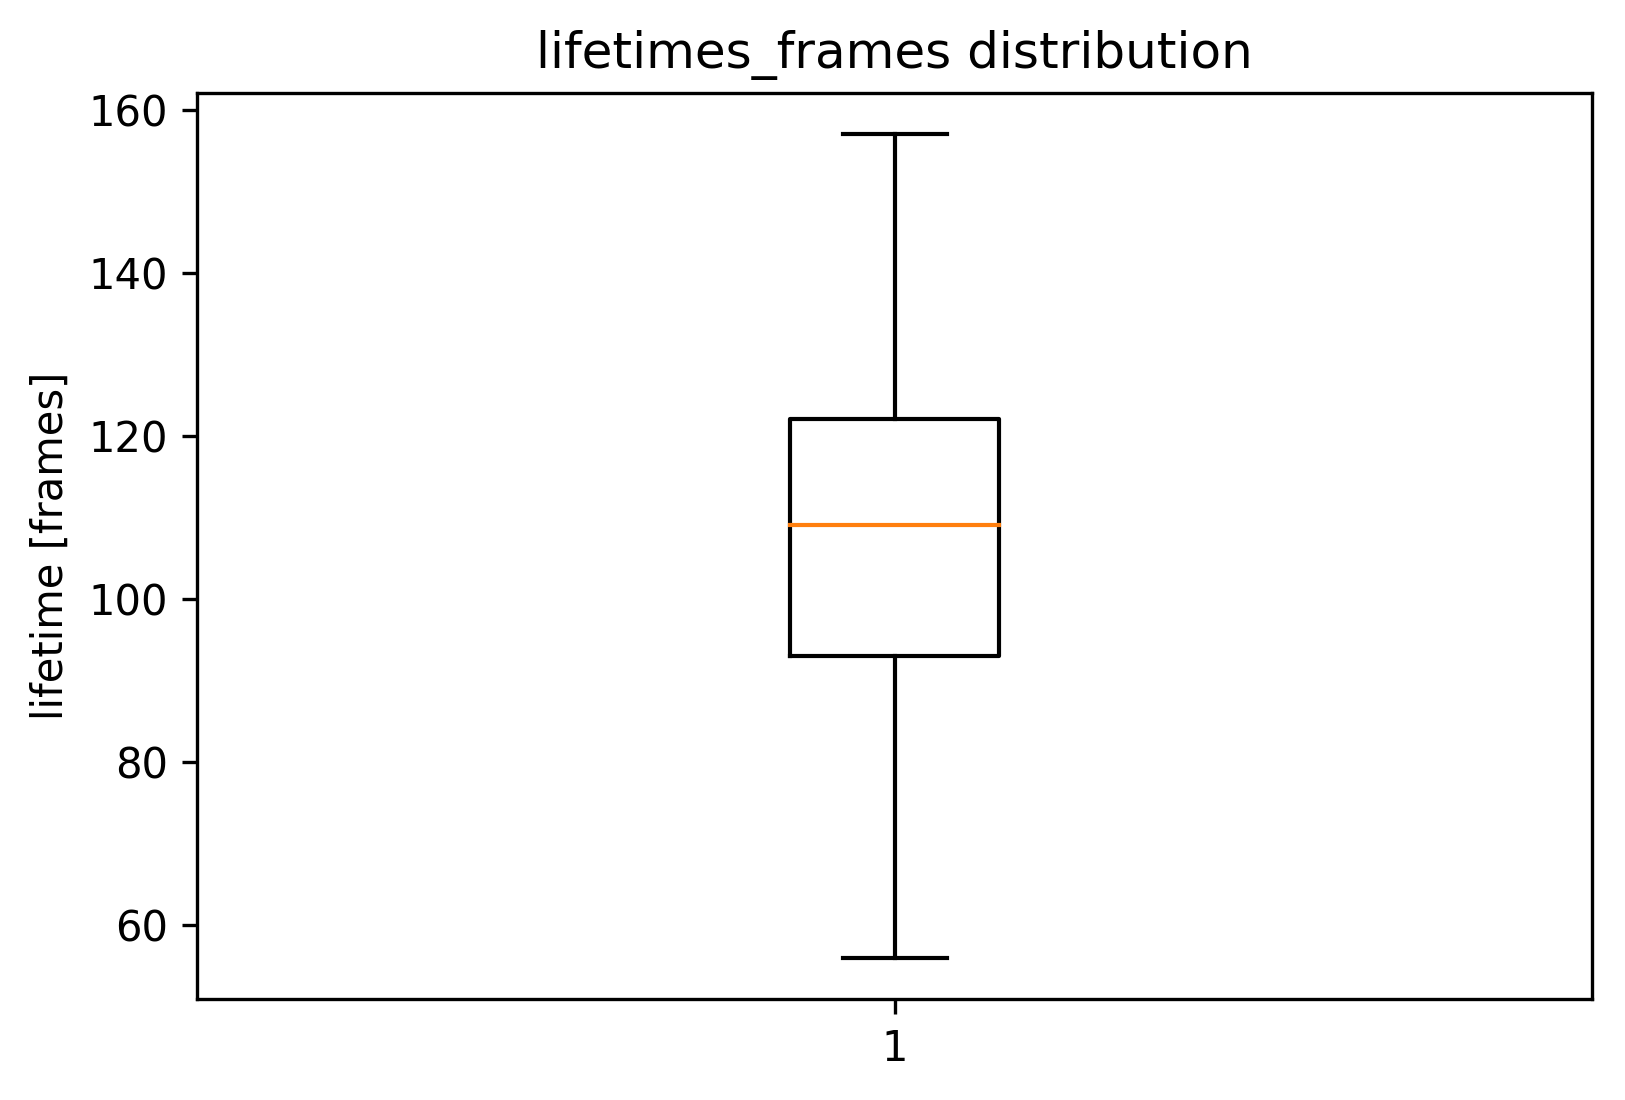

In [7]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_frames)
plt.title('lifetimes_frames distribution')
plt.ylabel('lifetime [frames]')
outputFigurePath= outputpath+"plot_lifetime_frames_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_lifetime_seconds_distribution.png


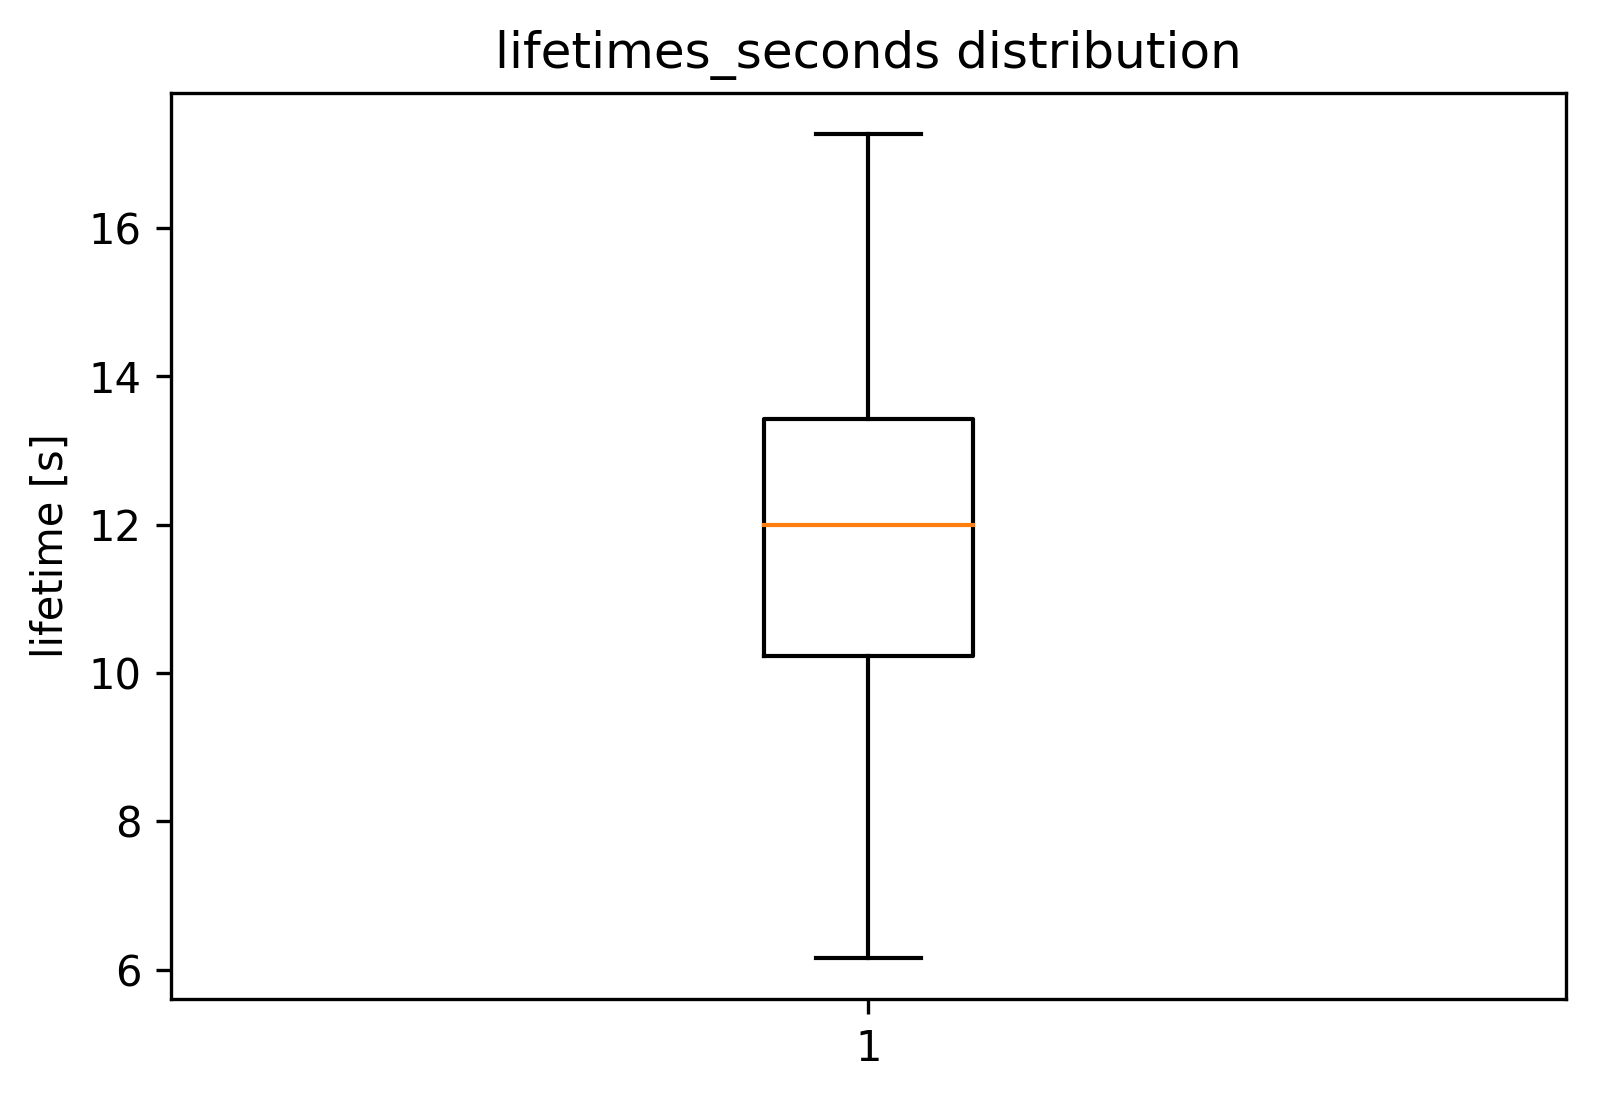

In [8]:
plt.figure(dpi=300)
plt.boxplot(lifetimes_seconds)
plt.title('lifetimes_seconds distribution')
plt.ylabel('lifetime [s]')
outputFigurePath= outputpath+"plot_lifetime_seconds_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Max Intensity Distribution

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_maxIntensity_distribution.png


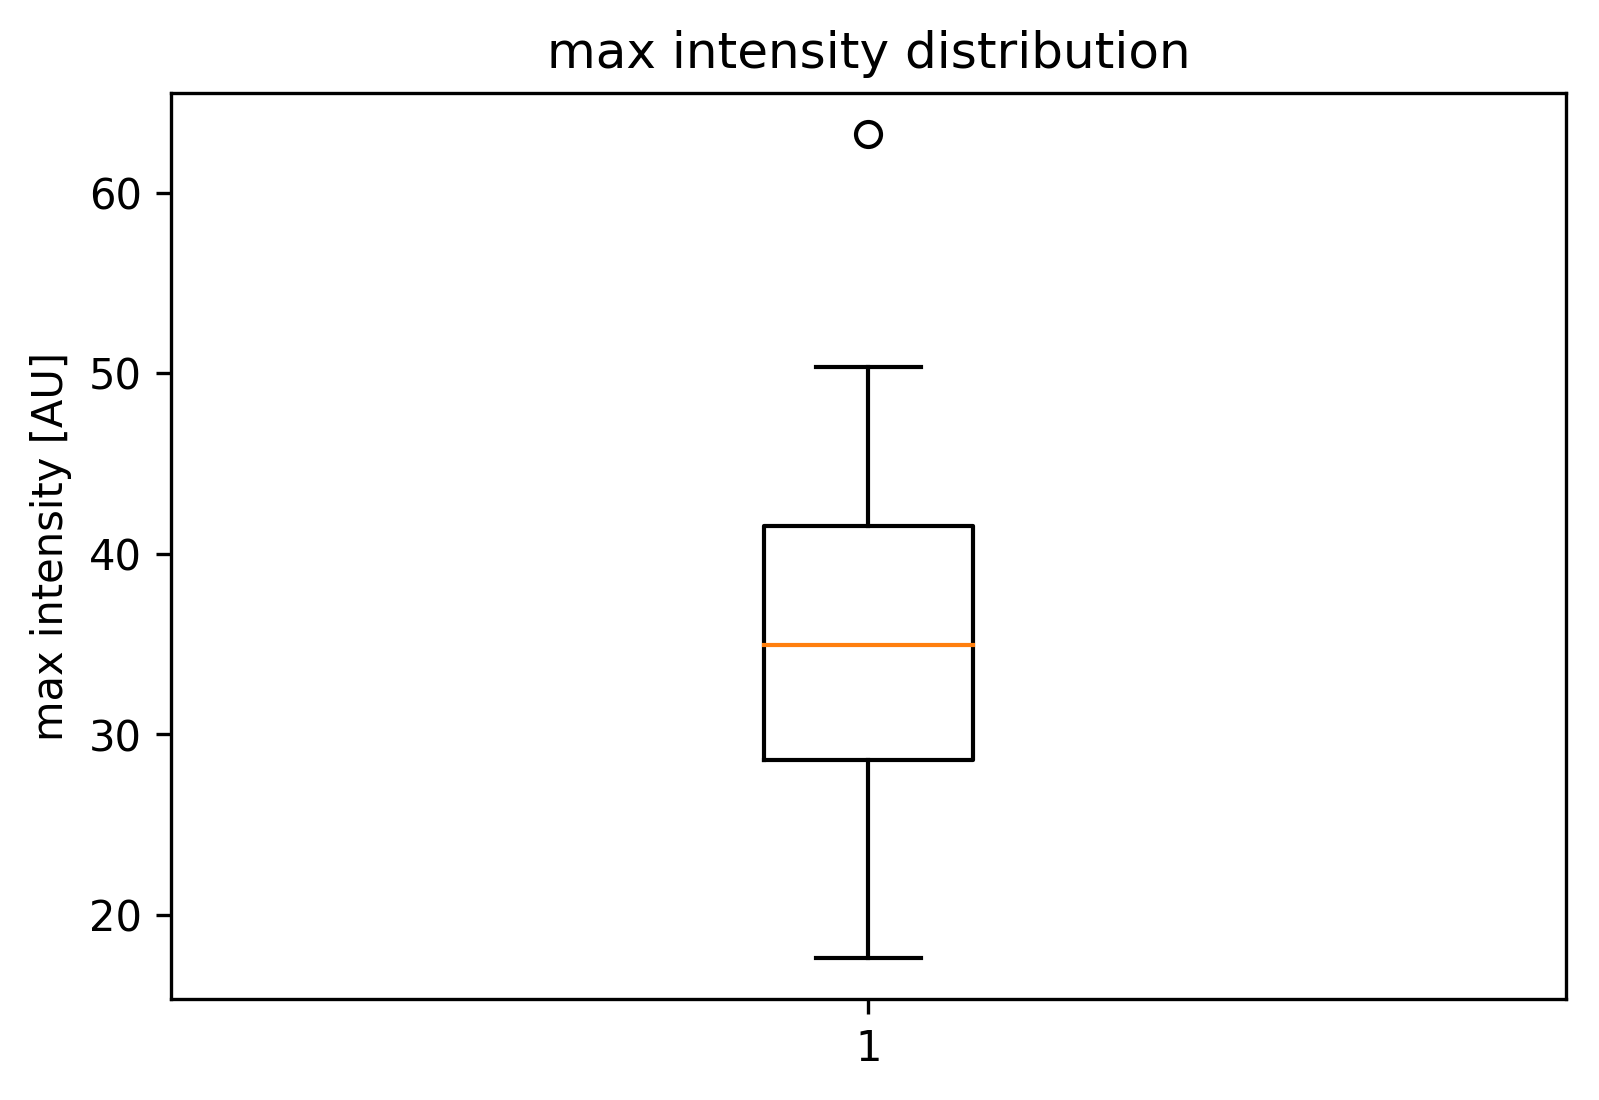

In [9]:
plt.figure(dpi=300)
plt.boxplot(maxIntensities)
plt.title('max intensity distribution')
plt.ylabel('max intensity [AU]')
outputFigurePath= outputpath+"plot_maxIntensity_distribution.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

# Intensities At Alignment Point

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_distance.png


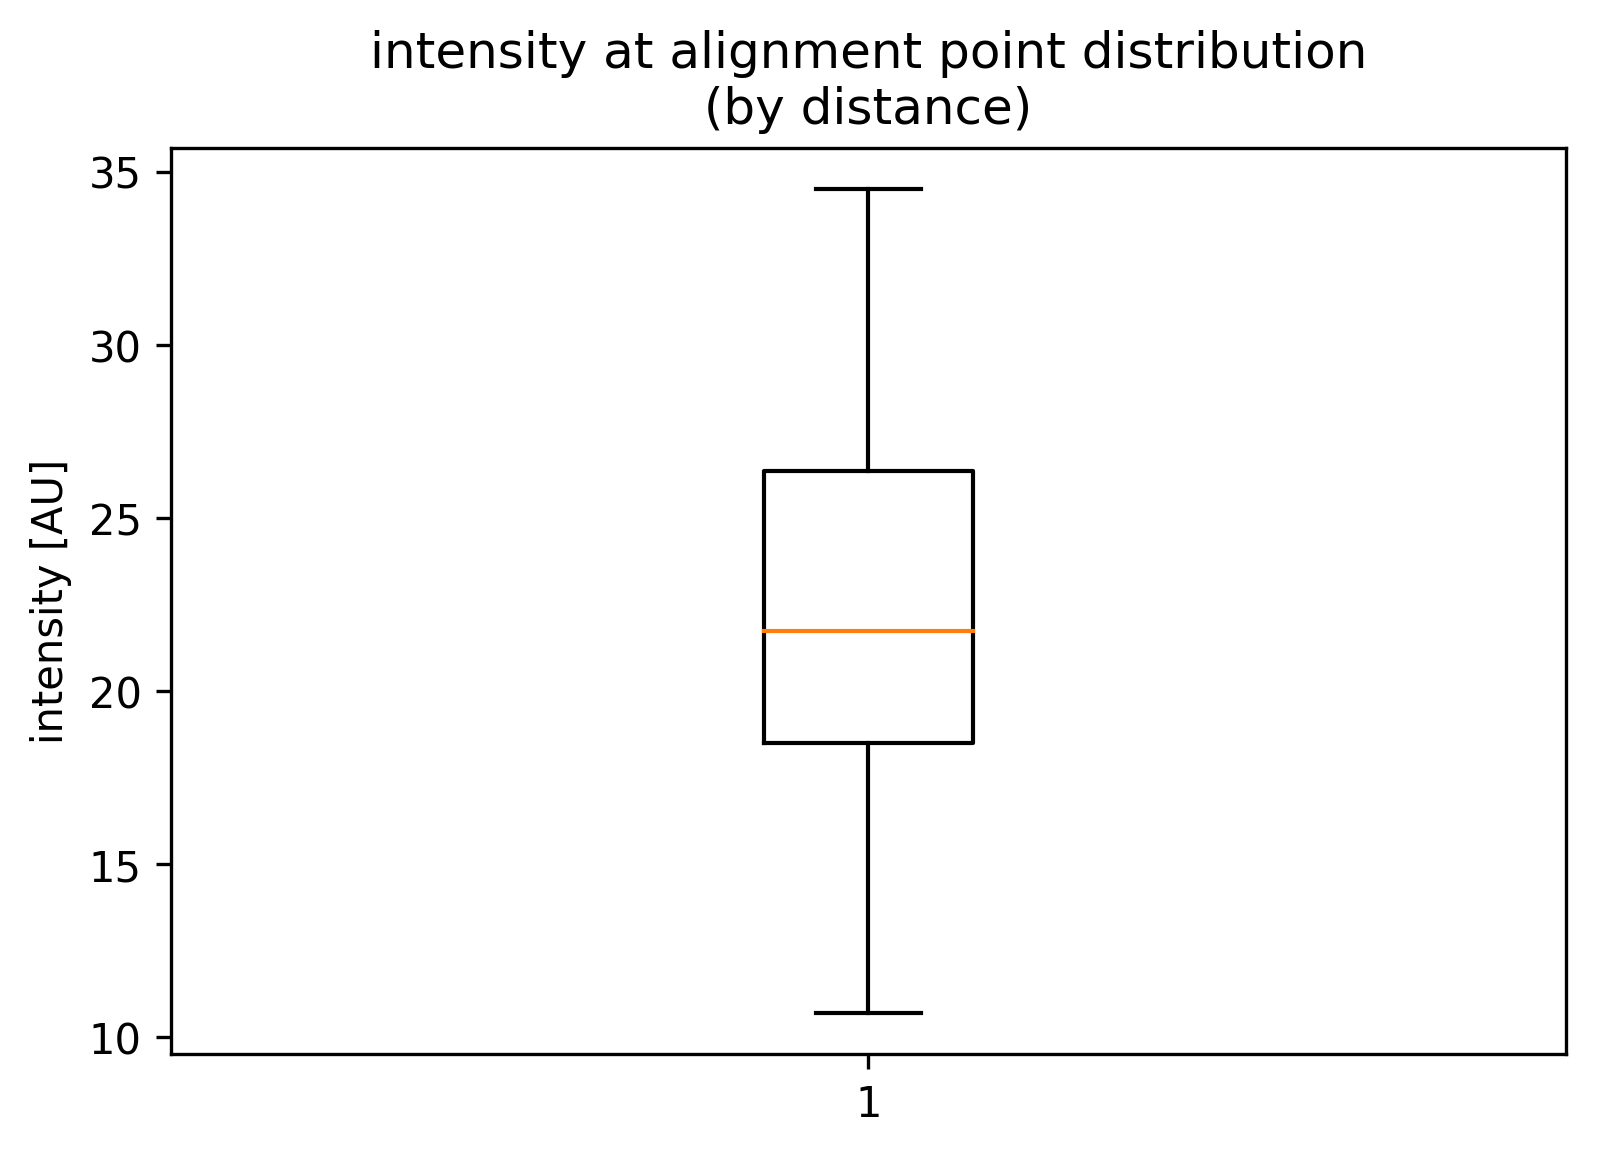

In [10]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byDistance)
plt.title('intensity at alignment point distribution\n(by distance)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_distance.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_intensity_raw.png


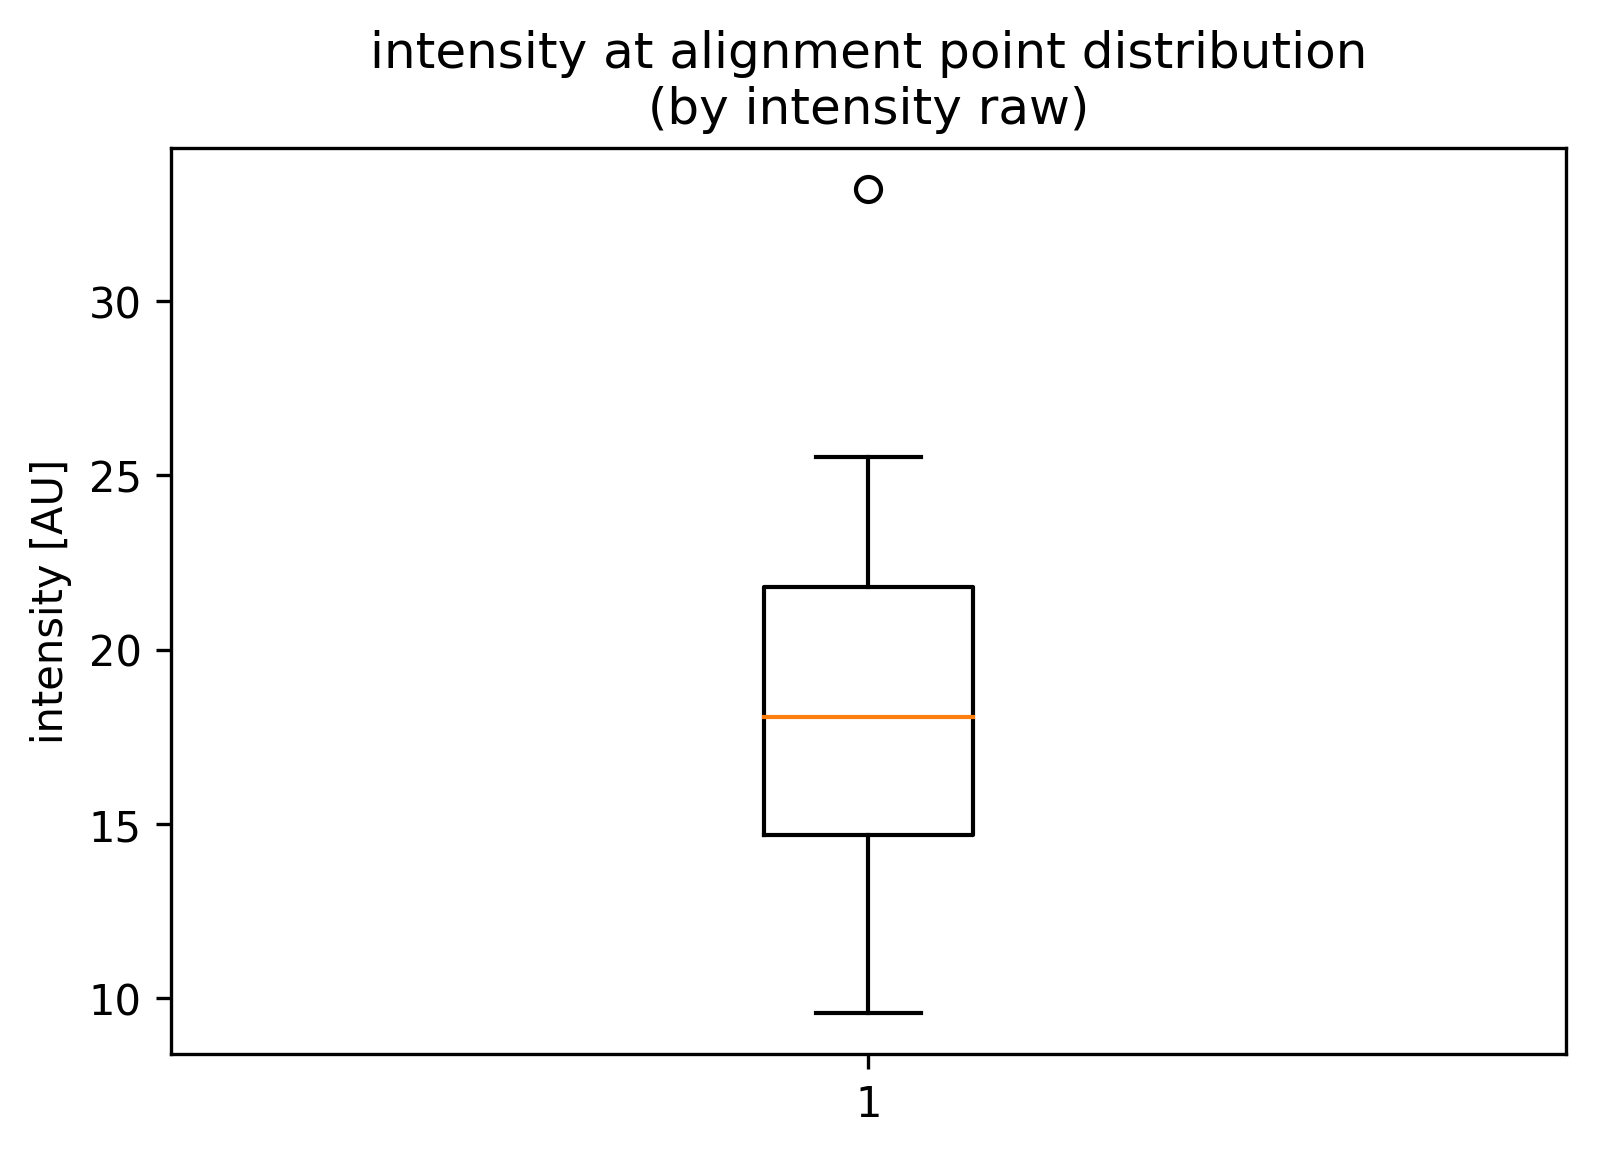

In [11]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_raw)
plt.title('intensity at alignment point distribution\n(by intensity raw)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_raw.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png


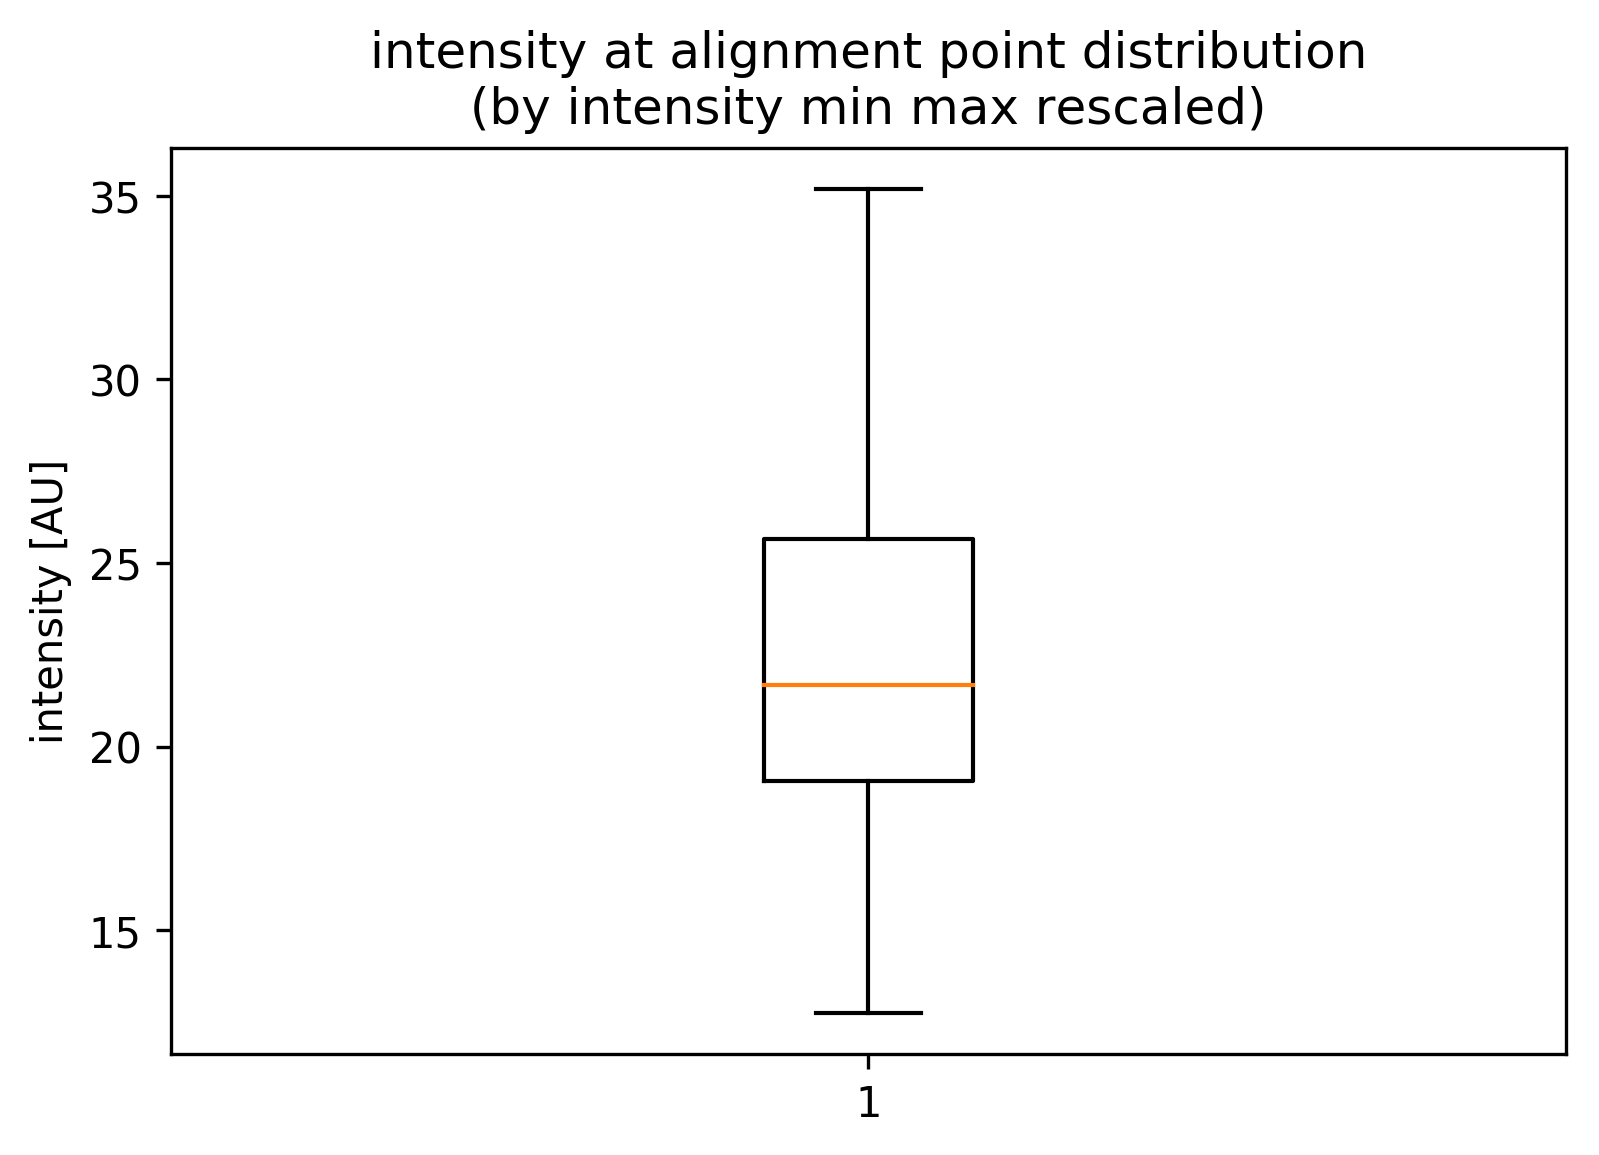

In [12]:
plt.figure(dpi=300)
plt.boxplot(intensities_atAlignmentPoint_byIntensity_minMaxRescaled)
plt.title('intensity at alignment point distribution\n(by intensity min max rescaled)')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_intensity_minMaxRescaled.png"
print(outputFigurePath)
plt.savefig(outputFigurePath)

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_dist_and_intensity.png


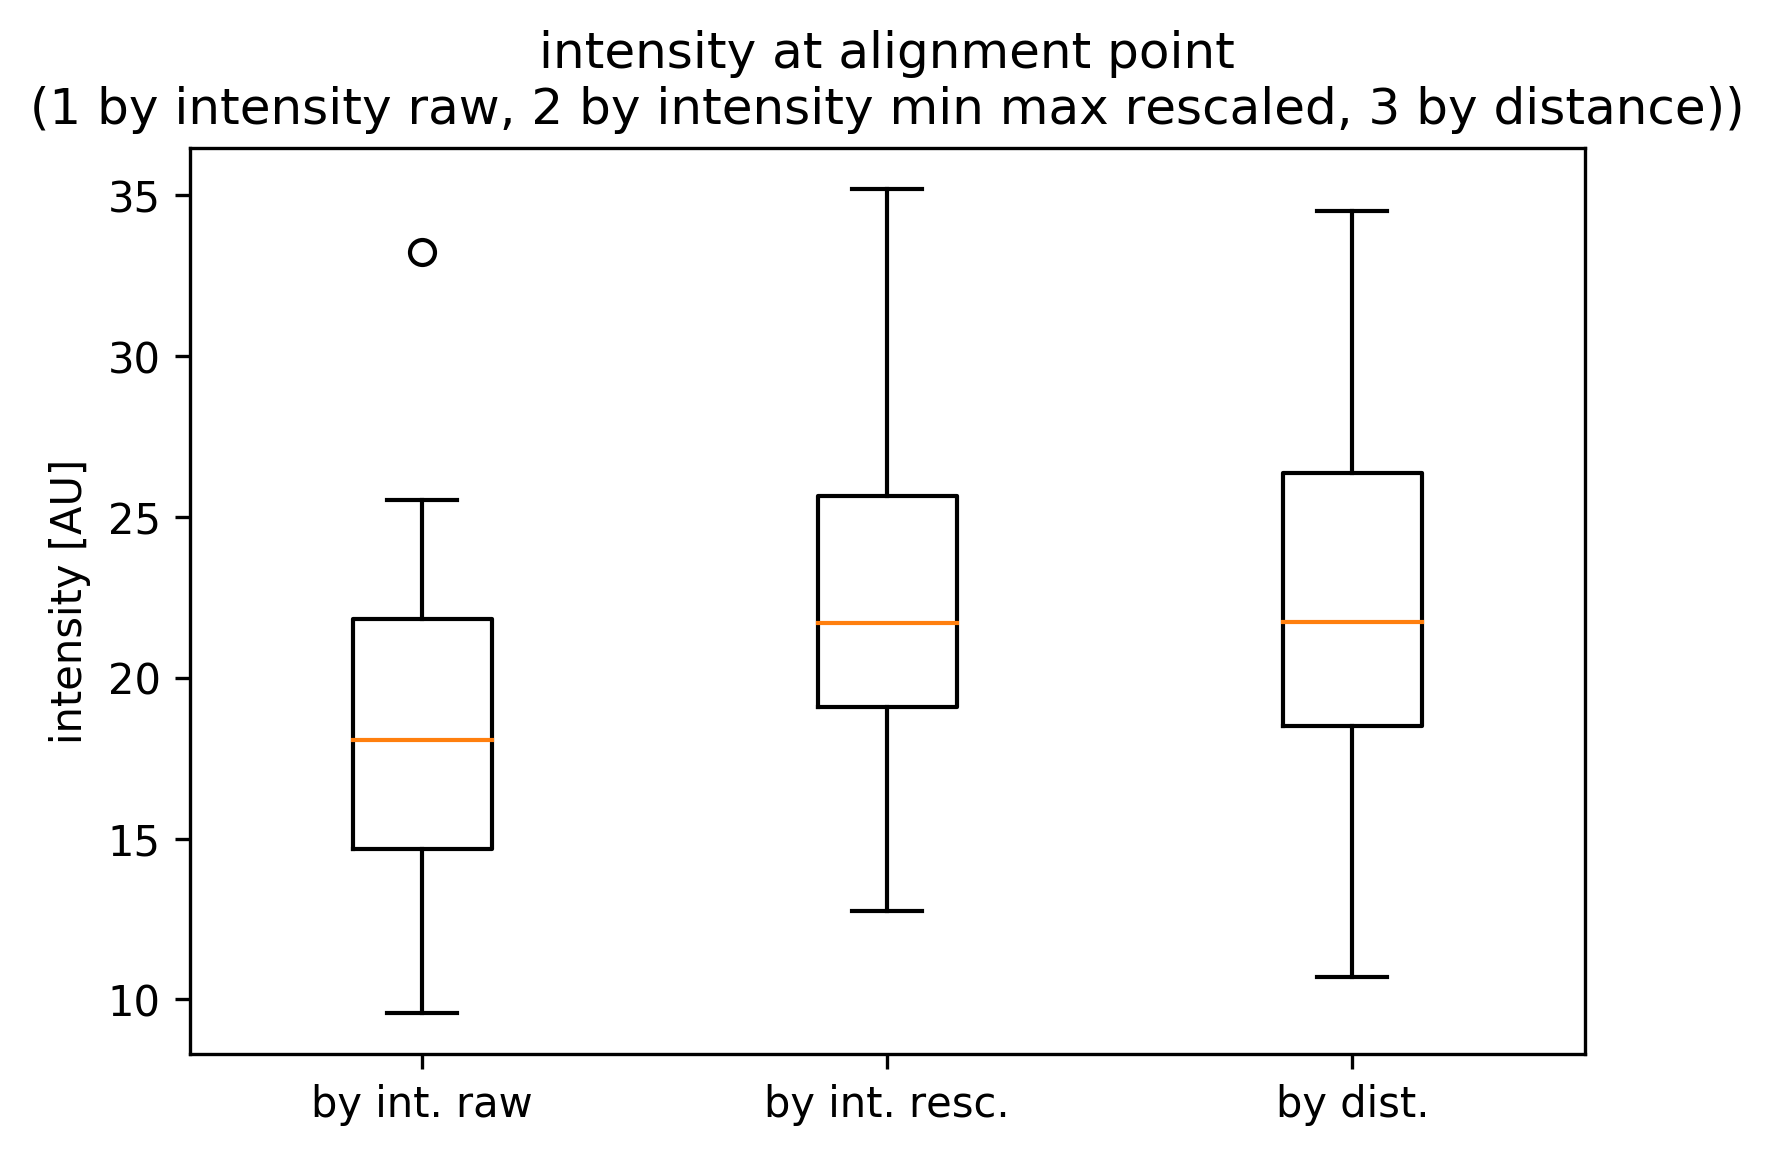

In [13]:
plt.figure(dpi=300)
plt.boxplot([intensities_atAlignmentPoint_byIntensity_raw,intensities_atAlignmentPoint_byIntensity_minMaxRescaled,intensities_atAlignmentPoint_byDistance])
plt.title('intensity at alignment point\n(1 by intensity raw, 2 by intensity min max rescaled, 3 by distance))')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_dist_and_intensity.png"
print(outputFigurePath)
#plt.xticklabels(["1","1","1"],rotation=45, fontsize=8)
plt.xticks([1, 2, 3], ['by int. raw', 'by int. resc.', 'by dist.'])
plt.savefig(outputFigurePath)

In [14]:
# The ∆t plots

In [15]:
intensities_atAlignmentPoint_byIntensity_raw_dt

[14.68956,
 23.303149999999999,
 14.8916,
 14.481929999999998,
 18.83605,
 21.949579999999997,
 15.431850000000001,
 21.810760000000002,
 18.074629999999999,
 21.372810000000001,
 25.515799999999999,
 12.68122,
 13.643939999999999,
 15.749410000000001,
 12.559280000000001,
 33.216079999999998,
 18.22035,
 9.5886499999999995,
 23.904060000000001,
 18.300000000000001,
 16.01314]

In [16]:
intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt

[18.123950000000001,
 28.054090000000002,
 17.503529999999998,
 19.073039999999999,
 23.419979999999999,
 25.653549999999999,
 20.436989999999998,
 29.401299999999999,
 21.922879999999999,
 22.83587,
 32.431139999999999,
 16.375720000000001,
 19.158089999999998,
 20.700489999999999,
 17.419599999999999,
 35.186160000000001,
 23.419339999999998,
 12.75365,
 29.418299999999999,
 21.690529999999999,
 19.210129999999999]

In [17]:
intensities_atAlignmentPoint_byDistance_dt

[23.196920000000002,
 19.728739999999998,
 10.706799999999999,
 18.48302,
 30.022840000000002,
 20.102429999999998,
 21.72785,
 33.309139999999999,
 22.17625,
 25.40286,
 11.58977,
 17.98686,
 13.871410000000001,
 21.821720000000003,
 20.40024,
 21.735779999999998,
 34.334009999999999,
 13.551129999999999,
 34.498059999999995,
 26.361969999999999,
 27.940559999999998]

/Users/yidi_lab/Desktop/YeastTrackAnalysis-master/dataToAnalyze/fim1/plot_intensity_distribution_at_alignment_by_dist_and_intensity.png


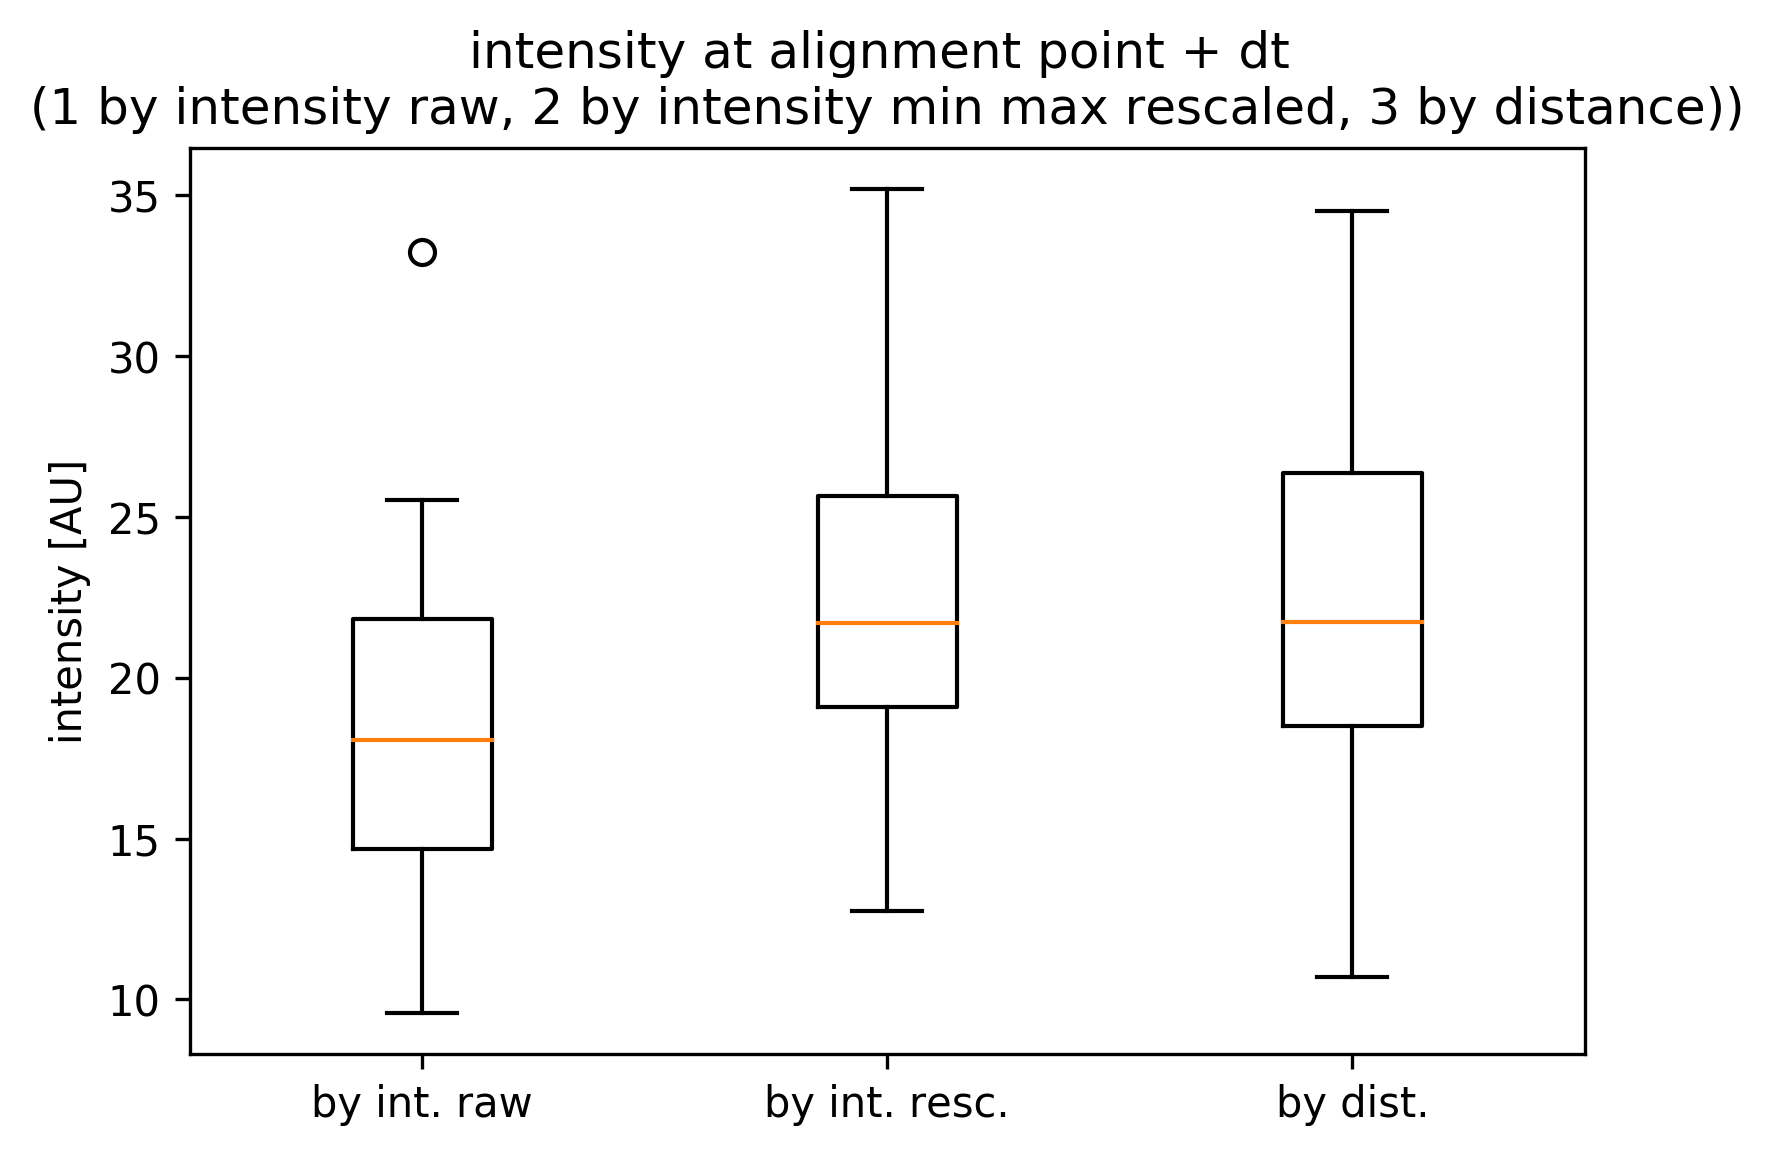

In [19]:
plt.figure(dpi=300)
plt.boxplot([intensities_atAlignmentPoint_byIntensity_raw_dt,intensities_atAlignmentPoint_byIntensity_minMaxRescaled_dt,intensities_atAlignmentPoint_byDistance_dt])
plt.title('intensity at alignment point + dt \n(1 by intensity raw, 2 by intensity min max rescaled, 3 by distance))')
plt.ylabel('intensity [AU]')
outputFigurePath= outputpath+"plot_intensity_distribution_at_alignment_by_dist_and_intensity.png"
print(outputFigurePath)
#plt.xticklabels(["1","1","1"],rotation=45, fontsize=8)
plt.xticks([1, 2, 3], ['by int. raw', 'by int. resc.', 'by dist.'])
plt.savefig(outputFigurePath)
